In [3]:
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime

import warnings
warnings.filterwarnings("ignore")

In [4]:
def formatstrat_csv_corrected():

    buyer_seller_num = 30
    buyer_list = ['B' + str(num) for num in range(1, buyer_seller_num + 1)]
    seller_list = ['S' + str(num) for num in range(1, buyer_seller_num + 1)]
    headers = buyer_list + seller_list

    # To store combined dataframes for every 100 trials. 
    combined_dfs = []

    # Loop through trial_1 to trial_300
    for start_trial in range(1, 301, 100):
        combined_df_for_100_trials = pd.DataFrame()

        for offset in range(100):
            trial_num = start_trial + offset

            df = pd.read_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/trial_{trial_num}_strats.csv')
            
            # Extract indices of columns with "actvprof=". 
            actvprof_indices = [idx for idx, col in enumerate(df.columns) if "actvprof=" in col]
            # Extract columns with active profit values. 
            active_profit_cols = [df.columns[i+1] for i in actvprof_indices]
            df = df[active_profit_cols]

            # Adjust headers to match number of columns. 
            adjusted_headers = headers[:df.shape[1]]
            df.columns = adjusted_headers

            # Sum the active profits and add to the combined dataframe for this set of 100 trials. 
            combined_df_for_100_trials[f'sum{trial_num}'] = df.sum(axis=1)

        # Compute the mean for each row, append to the combined df. 
        combined_df_for_100_trials['mean_pps'] = combined_df_for_100_trials.mean(axis=1)

        # Append this dataframe to our list of combined dfs. 
        combined_dfs.append(combined_df_for_100_trials)

    # Save the results to three  csvs. 
    for idx, combined_df in enumerate(combined_dfs, 1):
        combined_df.to_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/formatted_sums_{idx}.csv', index=False)

    return "Successfully formatted data and computed mean profits for 300 trials."

formatstrat_csv_corrected()


'Successfully formatted data and computed mean profits for 300 trials.'

In [5]:
def formatstrat_csv_updated():

    buyer_seller_num = 30
    buyer_list = ['B' + str(num) for num in range(1, buyer_seller_num + 1)]
    seller_list = ['S' + str(num) for num in range(1, buyer_seller_num + 1)]
    headers = buyer_list + seller_list

    # df to store the mean profit for each trial. 
    all_trials_mean_profit = pd.DataFrame()

    # Loop through trial_1 to trial_300. 
    for trial_num in range(1, 301):
        
        df = pd.read_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/trial_{trial_num}_strats.csv')
            
        # Extract indices of columns with "actvprof=". 
        actvprof_indices = [idx for idx, col in enumerate(df.columns) if "actvprof=" in col]
        # Extract columns with active profit values. 
        active_profit_cols = [df.columns[i+1] for i in actvprof_indices]
        df = df[active_profit_cols]

        # Adjust headers to match number of columns
        adjusted_headers = headers[:df.shape[1]]
        df.columns = adjusted_headers

        # Compute the mean profit for this trial and append to the df. 
        all_trials_mean_profit[f'mean_trial_{trial_num}'] = df.mean(axis=1)

    # Compute the average of these mean profits across all trials. 
    all_trials_mean_profit['avg_mean_profit'] = all_trials_mean_profit.mean(axis=1)

    # Save only the averaged column. 
    final_df = all_trials_mean_profit[['avg_mean_profit']]
    final_df.to_csv('/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/avg_mean_profit.csv', index=False)

    return "Successfully computed and saved the average mean profits for 300 trials!!"

formatstrat_csv_updated()


'Successfully computed and saved the average mean profits for 300 trials.'

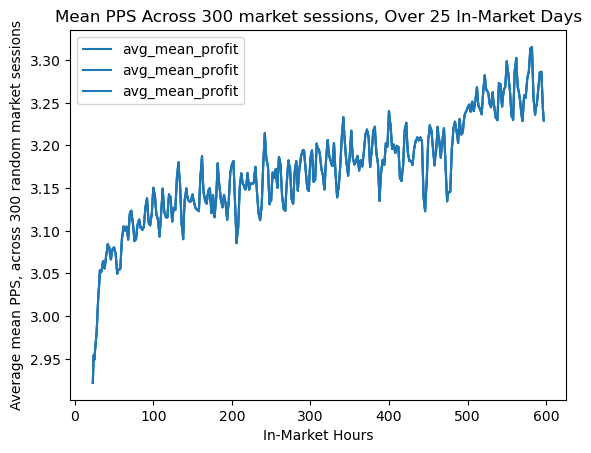

In [17]:
def plot_csv_data_single_graph(file_path):
    df = pd.read_csv(file_path)
     
    df = df.rolling(window=24).mean()

    # Plot the PPS data as a line graph. 

    sns.lineplot(data=df, dashes=False).set(title='Mean PPS Across 300 market sessions, Over 25 In-Market Days', xlabel='In-Market Hours', ylabel='Average mean PPS, across 300 random market sessions')

    plt.savefig('mean_pps_across_market_session.png')


# Plot the sets. 
for num in range(1,4):
    plot_csv_data_single_graph(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/avg_mean_profit.csv')


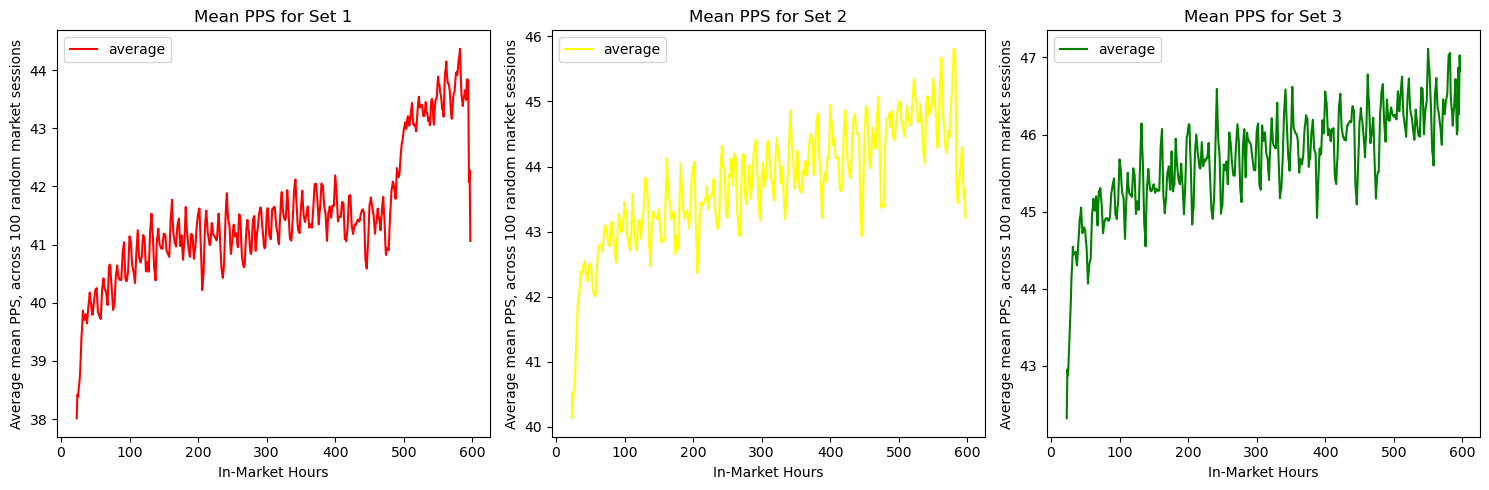

In [18]:

colours = ['red', 'yellow','green']

# Create a figure with subplots. 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the data with the desired colours. 
for num, ax, colour in zip(range(1, 4), axes, colours):
    df = pd.read_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/formatted_sums_{num}.csv')
    df = df.rolling(window=24).mean()
    
    df['average'] = df.mean(axis=1)
    df = df[['average']]
    sns.lineplot(data=df, ax=ax, dashes=False, palette=[colour]).set(title=f'Mean PPS for Set {num}', 
                                                                    xlabel='In-Market Hours', 
                                                                    ylabel='Average mean PPS, across 100 random market sessions')

# Adjusting the layout to prevent overlap. 
plt.tight_layout()
plt.show()





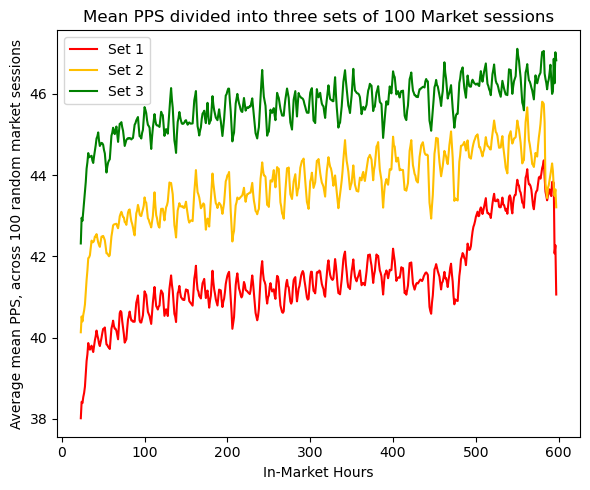

In [51]:

colors[1] = "#FFBF00"  # Deeper amber color. 

# Create a single figure for layering the plots. 
fig, ax = plt.subplots(figsize=(6, 5))

for num, color, offset in zip(range(1, 4), colors, offsets):
    df = pd.read_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/formatted_sums_{num}.csv')
    
    df = df.rolling(window=24).mean()
    
    df['average'] = df.mean(axis=1) + offset
    df = df[['average']]
    

    ax.plot(df.index, df['average'], color=color, label=f'Set {num}')

# Setting title and labels. 
ax.set_title('Mean PPS divided into three sets of 100 Market sessions')
ax.set_xlabel('In-Market Hours')
ax.set_ylabel('Average mean PPS, across 100 random market sessions')
ax.legend()

# Displaying the layered plot. 
plt.tight_layout()
plt.savefig('mean_pps_across_market_session_sets.png')
plt.show()


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multiple_strategy_paths(trial_num, num_paths=1, transparency=0.7):
    df_strat = pd.read_csv(f'/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/trial_{trial_num}_strats.csv')

    strategy_cols_dict = {col: df_strat.columns[i+1] for i, col in enumerate(df_strat.columns) if "actvstrat=" in col}

    df_selected_strategies = df_strat[list(strategy_cols_dict.values())]
    df_selected_strategies.columns = strategy_cols_dict.keys()

    # Plotting the strategy paths. 
    plt.figure(figsize=(13, 6))
    for i, trader in enumerate(df_selected_strategies.columns[:num_paths]):
        sns.lineplot(data=df_selected_strategies, x=df_selected_strategies.index, y=trader, label=trader, alpha=transparency)

        # Add points for starting and ending strategies
        plt.scatter(df_selected_strategies.index[0], df_selected_strategies[trader].iloc[0], color='black', marker='o', s=100)
        plt.scatter(df_selected_strategies.index[-1], df_selected_strategies[trader].iloc[-1], color='black', marker='x', s=100)

        # Break the loop if the desired number of paths have been plotted. 
        if i + 1 >= num_paths:
            break

    plt.title(f'Strategy Paths of 5 PRDE Traders, In A Market Session of random specification')
    plt.xlabel('In-Market Hours')
    plt.ylabel('Strategy Value, [-1, 1]')
    plt.legend(title='Trader', loc='upper left')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f'different_seed_strat_test_{trial_num}.png')
    plt.show()



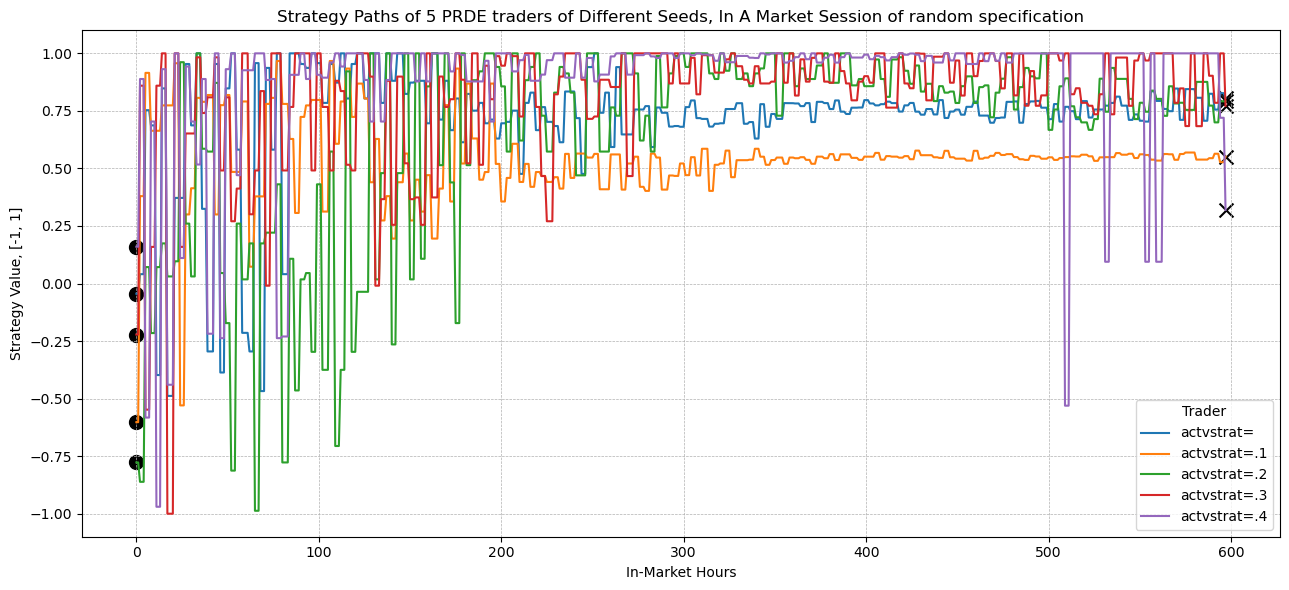

In [32]:

plot_multiple_strategy_paths(158, num_paths=5, transparency=1)



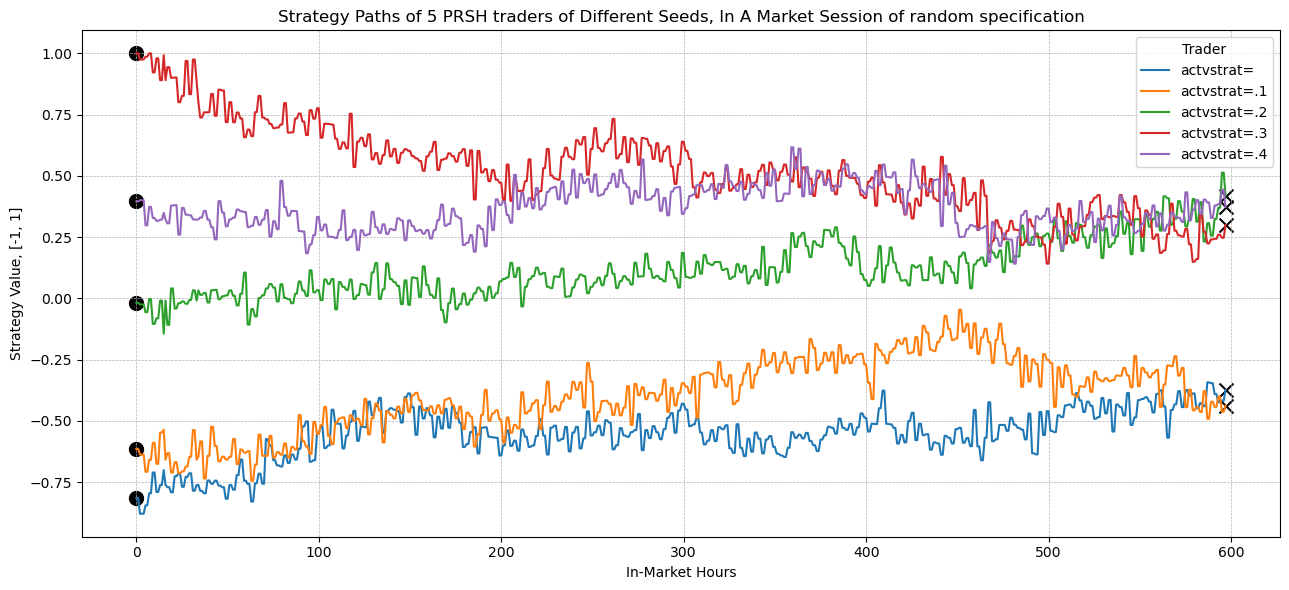

In [34]:
plot_multiple_strategy_paths(129, num_paths=5, transparency=1)

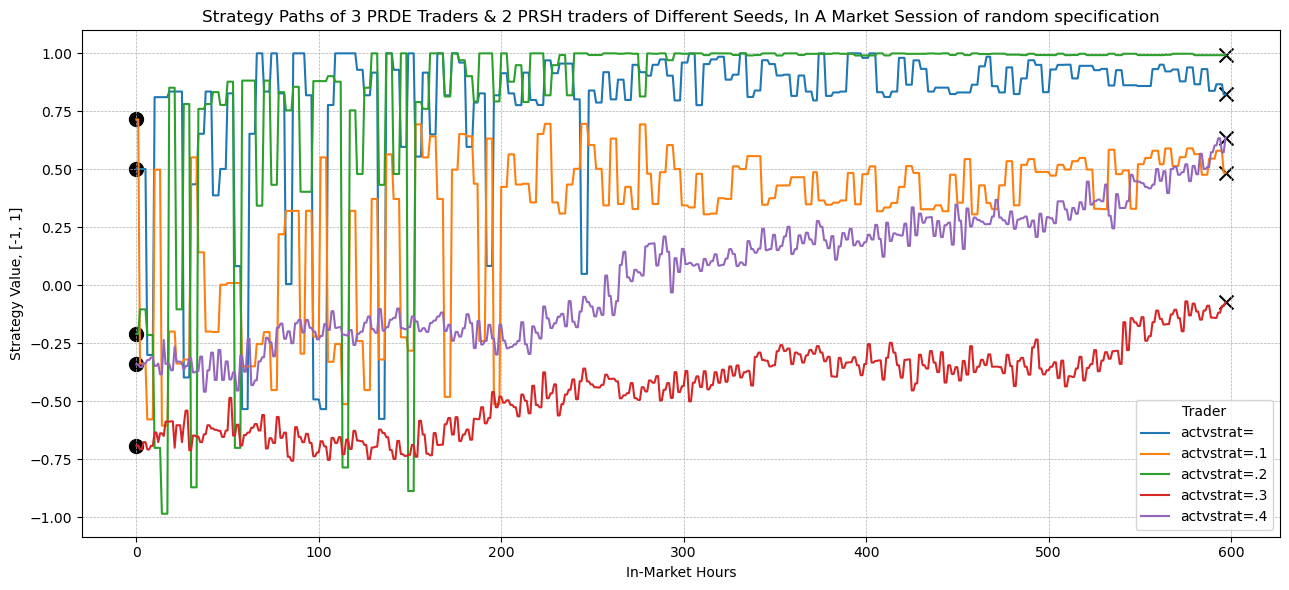

In [38]:
plot_multiple_strategy_paths(14, num_paths=5, transparency=1)

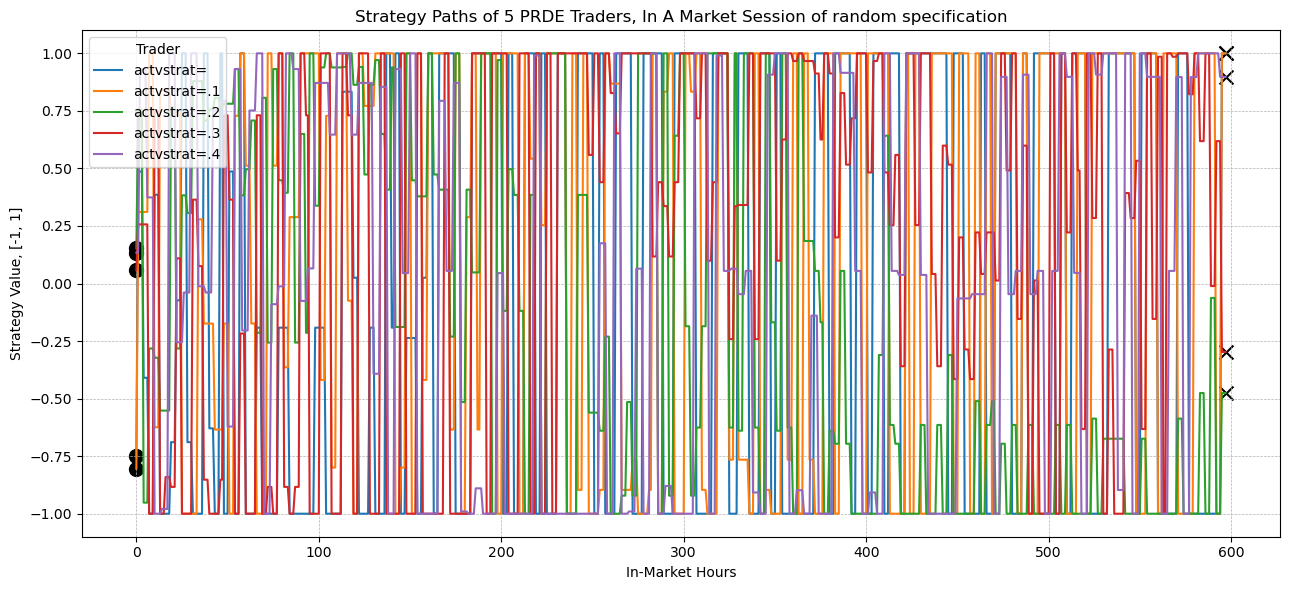

In [41]:
plot_multiple_strategy_paths(101, num_paths=5, transparency=1)

In [45]:
def compute_aggregate_pps_for_trials_revised(start_trial, end_trial, file_path_template, market_time):
    
    # Placeholder list to store aggregate PPS values for all trials. 
    aggregate_pps_values = []

    # For each trial, compute the aggregate PPS, in the same way as the postsim step. 
    for trial_num in range(start_trial, end_trial + 1):
        file_path = file_path_template.format(trial_num)
        
        df_avg = pd.read_csv(file_path, header=None)
        
        trader_ids = df_avg.iloc[0][4::3].tolist()
        profit_values = df_avg.iloc[0][5::3].tolist()
        

        trader_profit_pairs = zip(trader_ids, profit_values)
        
        # Extract and sum the profit values, the only upper casse column in the file will be trader type names. 
        total_profit = sum([float(profit) for trader, profit in trader_profit_pairs if isinstance(trader, str) and trader.isupper()])
        
        # Calculate aggregate PPS for the given trial. 
        aggregate_pps = total_profit / market_time
        aggregate_pps_values.append(aggregate_pps)
    
    # Convert the list to a df. 
    df_aggregate_pps = pd.DataFrame(aggregate_pps_values, columns=['Aggregate_PPS'])
    
    return df_aggregate_pps


file_path_template = '/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/trial_{}_avg_balance.csv'


df_aggregate_pps = compute_aggregate_pps_for_trials_revised(1, 315, file_path_template, 2160000)
df_aggregate_pps.to_csv("aggregate_pps_300.csv", index=False)

zero_rows = df_aggregate_pps[df_aggregate_pps['Aggregate_PPS'] == 0].index.tolist()
count_zero = len(zero_rows)
count_zero, zero_rows

(3, [67, 77, 89])

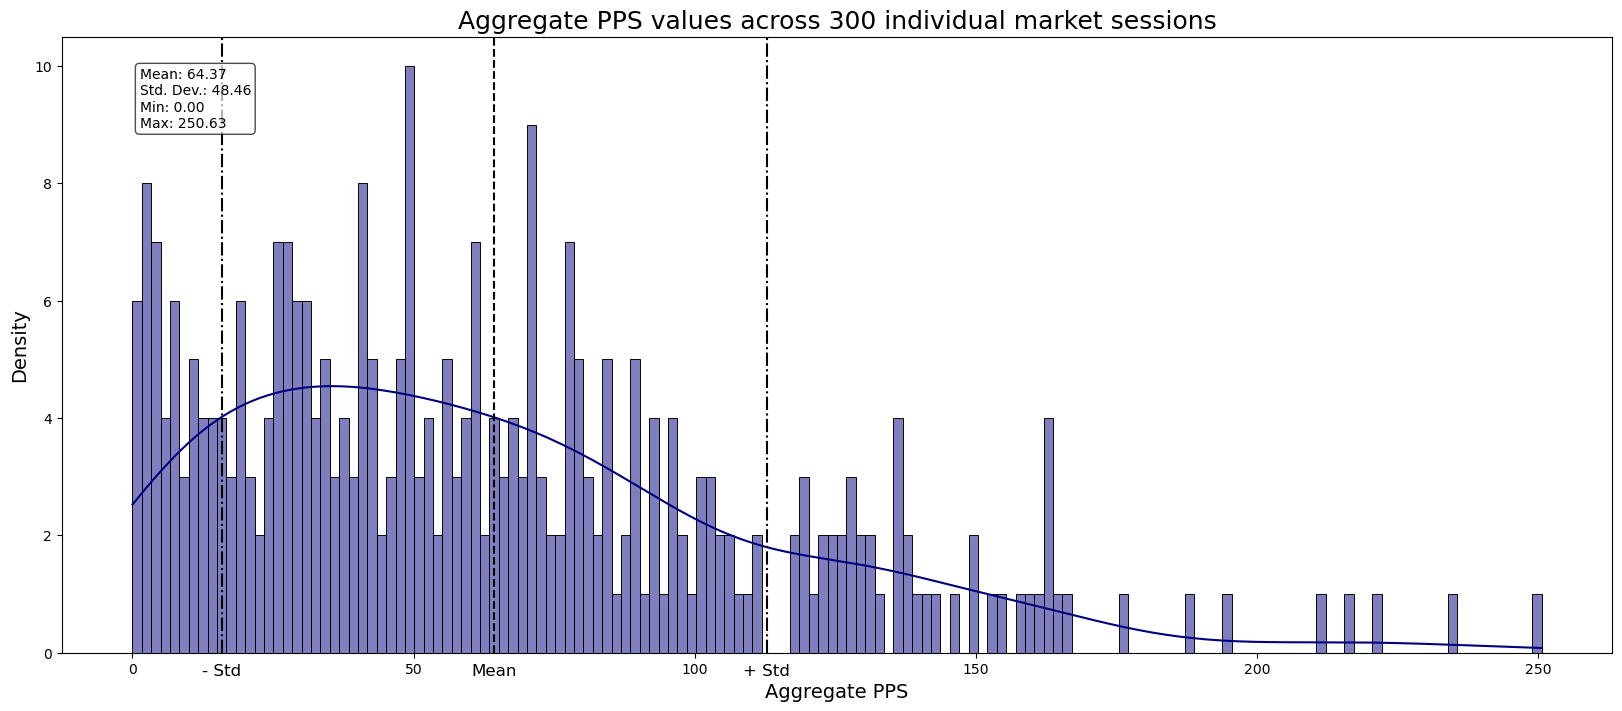

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


plt.figure(figsize=(20, 8))

# Plotting the histogram with KDE.
ax = sns.histplot(df_aggregate_pps['Aggregate_PPS'], kde=True, bins=150, color="navy")

# print(df_aggregate_pps['Aggregate_PPS'])

# Setting the title and labels for the histo.
plt.title('Aggregate PPS values across 300 individual market sessions', fontsize=18)
plt.xlabel('Aggregate PPS', fontsize=14)
plt.ylabel('Density', fontsize=14)




mean_value = df_aggregate_pps['Aggregate_PPS'].mean()
std_value = df_aggregate_pps['Aggregate_PPS'].std()


plt.axvline(mean_value, color='black', linestyle='--', linewidth=1.5)
plt.axvline(mean_value + std_value, color='black', linestyle='-.', linewidth=1.5)
plt.axvline(mean_value - std_value, color='black', linestyle='-.', linewidth=1.5)


y_min, y_max = plt.ylim()
plt.text(mean_value, -0.03*y_max, 'Mean', ha='center', va='center', color='black', fontsize=12)
plt.text(mean_value + std_value, -0.03*y_max, '+ Std', ha='center', va='center', color='black', fontsize=12)
plt.text(mean_value - std_value, -0.03*y_max, '- Std', ha='center', va='center', color='black', fontsize=12)


min_val = df_aggregate_pps['Aggregate_PPS'].min()
max_val = df_aggregate_pps['Aggregate_PPS'].max()
stats_text = f"Mean: {mean_value:.2f}\nStd. Dev.: {std_value:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}"
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', bbox={'boxstyle':'round', 'facecolor': 'white', 'alpha': 0.7})

# displaying the plott. 
plt.savefig('Aggregate PPS values across 300 individual market sessions.png')
plt.show()


In [49]:
file_path_template = '/Users/andrewnaoyamcwilliam/OneDrive/Desktop/UOB/Dissertation/trial_{}_avg_balance.csv'

def extract_trader_info_avg_file_corrected(df_avg):
    trader_details = {}
    i = 4  # Start from the 5th column (0-indexed), whcich is where the first trader identifer is. 
    
    while i < df_avg.shape[1]:
        try:
            trader_type = str(df_avg.iloc[0, i]).strip()
            if not trader_type.isupper():
                break
            
            # Ensure that the next column contains a numeric value before attempting conversion. 
            if pd.to_numeric(df_avg.iloc[0, i + 1], errors='coerce') is not None:
                total_profit = float(df_avg.iloc[0, i + 1])
            else:
                break
                
            num_traders = float(df_avg.iloc[0, i + 2])
            avg_profit_per_trader = total_profit / num_traders if num_traders != 0 else 0
            avg_pps_per_trader = avg_profit_per_trader / 2160000
            trader_details[trader_type] = avg_pps_per_trader
            
            i += 4  # Move to the next trader type, which will always be across the next 4 columns.
        except (IndexError, ValueError):
            break

    return trader_details

def extract_all_trader_info_corrected(start_trial, end_trial, file_path_template):
    """
    Iterates over all trials specified and extracts trader details for each trial using the 
    `extract_trader_info_avg_file_corrected` function.
    """
    all_data = []
    
    for trial_num in range(start_trial, end_trial + 1):
        file_path = file_path_template.format(trial_num)
        df_avg = pd.read_csv(file_path, header=None)
        trial_data = extract_trader_info_avg_file_corrected(df_avg)
        all_data.append(trial_data)
        
    # Convert list of dictionaries to df. 
    df_all_trader_details = pd.DataFrame(all_data)
    
    df_all_trader_details.to_csv("average_pps_by_trader_corrected.csv", index=False)
    
    return df_all_trader_details


df_all_trader_details = extract_all_trader_info_corrected(1, 300, file_path_template)


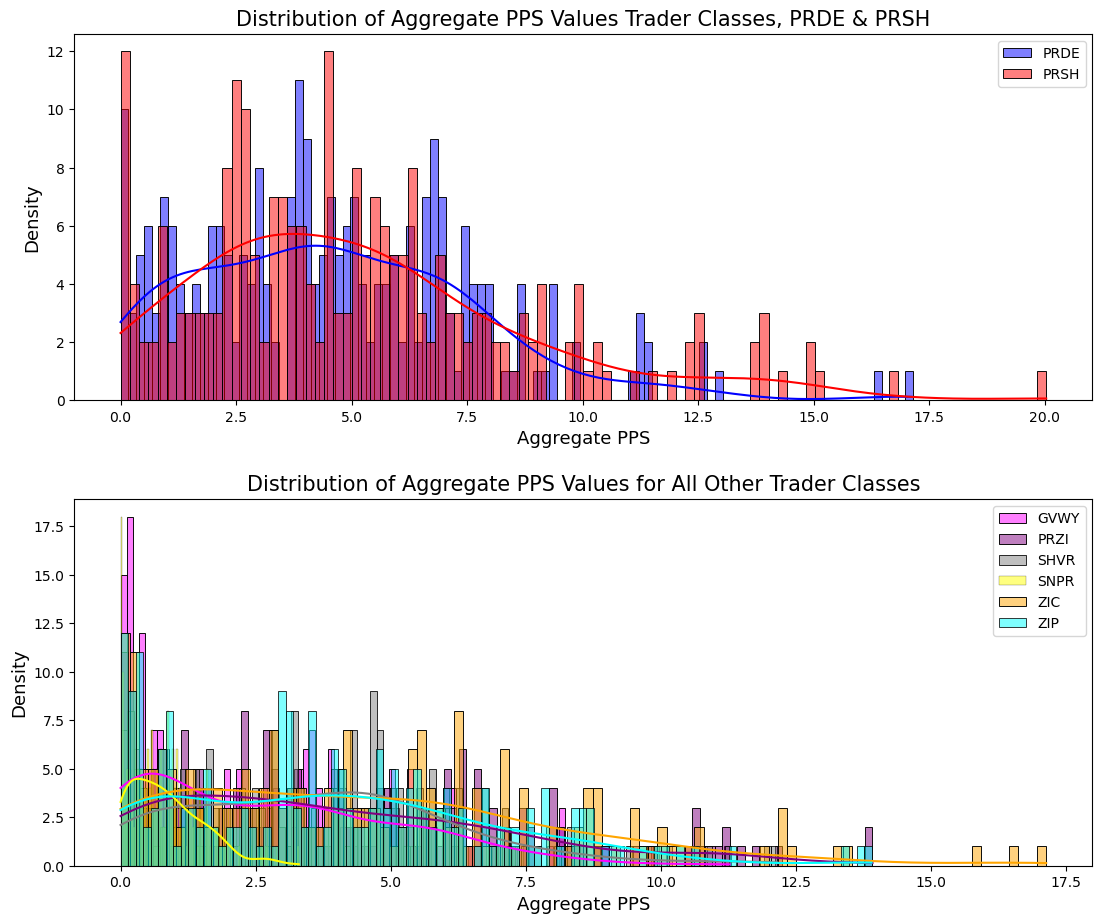

In [50]:

trader_colors = {
    'PRDE': 'blue',
    'PRSH': 'red',
    'ZIP': 'cyan',
    'ZIC': 'orange',
    'PRZI': 'purple',
    'SHVR': 'grey',
    'GVWY': 'magenta',
    'SNPR': 'yellow'
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.tight_layout(pad=5)

# Plotting PRDE and PRSH, in the first subplot. 
for trader_type in ['PRDE', 'PRSH']:
    sns.histplot(df_all_trader_details[trader_type].dropna(), kde=True, ax=axes[0], 
                 bins=100, label=trader_type, color=trader_colors[trader_type], alpha=0.5)


axes[0].set_title('Distribution of Aggregate PPS Values Trader Classes, PRDE & PRSH', fontsize=15)
axes[0].legend()
axes[0].set_xlabel('Aggregate PPS', fontsize=13)
axes[0].set_ylabel('Density', fontsize=13)

# Plotting all other traders. 
other_traders = [col for col in df_all_trader_details.columns if col not in ['PRDE', 'PRSH', 'Trial']]
for trader_type in other_traders:
    sns.histplot(df_all_trader_details[trader_type].dropna(), kde=True, bins=100, ax=axes[1], 
                 label=trader_type, color=trader_colors.get(trader_type, 'grey'), alpha=0.5)


axes[1].set_title('Distribution of Aggregate PPS Values for All Other Trader Classes', fontsize=15)
axes[1].legend(loc='upper right')
axes[1].set_xlabel('Aggregate PPS', fontsize=13)
axes[1].set_ylabel('Density', fontsize=13)

plt.savefig('Aggregate PPS values across 300 individual market sessions, by trader.png')
plt.show()
